**IMPORTING THE LIBRARIES**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


**Data Collecting and Processing**




In [26]:
#loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv("C:\\Users\\Nandini\\Desktop\\github\\gld_price_data.csv")

# New Section

In [27]:
# Print the first 5 rows of the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [28]:
#Print the last 5 rows of the dataFrame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [29]:
# number of rows and coloums
gold_data.shape

(2290, 6)

In [30]:
# getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [31]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [32]:
# getting the statistical measures of the data
gold_data.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation:**

**1.Positive Correlation**

**2.Negative Correlation**


In [33]:
gold_data_numeric = gold_data.select_dtypes(include=[np.number])
gold_data_cleaned = gold_data_numeric.fillna(0)
correlation = gold_data_cleaned.corr()


<Axes: >

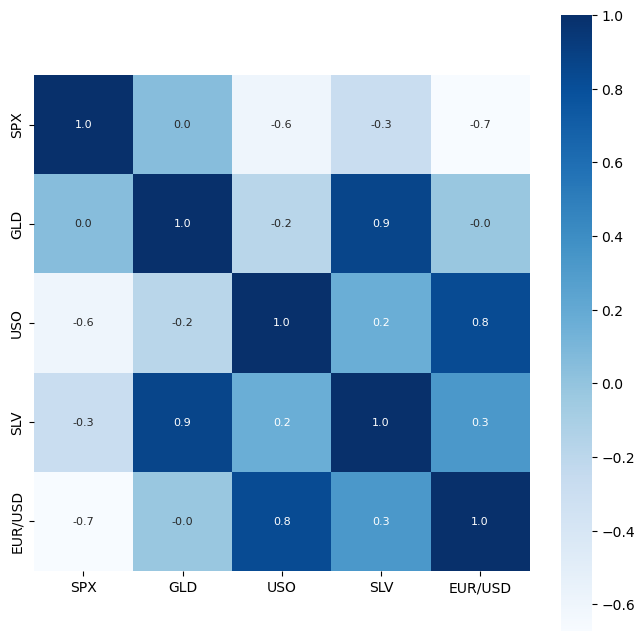

In [34]:
# Construct a heatmap to understand the correlation 
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={'size':8},cmap="Blues")

In [35]:
 # correlation values of GOLD(GLD)
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


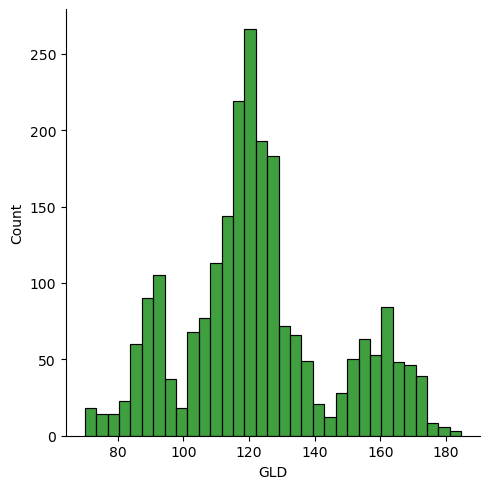

In [36]:
# correlation of the distribution of the GLD price
sns.displot(gold_data_cleaned['GLD'],color='green')

**Splitting the Features and Target**

In [37]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [38]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [39]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


**Splitting into training data and Test Data**

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=2)

**Model Training:**
Random Forest Regressor

In [41]:
regressor = RandomForestRegressor(n_estimators=100)


In [42]:
# training of the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

**Model Evaluation**

In [43]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [44]:
print(test_data_prediction)

[168.78939974  81.73049978 116.06710025 127.70980105 120.63980159
 154.73969799 150.4044984  125.93810029 117.35799886 126.02600082
 116.86110089 171.99590104 141.84859833 167.75949887 115.3293999
 117.88870057 139.90880263 170.26510108 159.61460307 163.10490014
 154.89480007 125.2230003  176.01439949 157.11950381 125.15800045
  94.13529968  78.28349994 120.54759993 119.08799928 167.5439
  87.99980073 125.17120071  91.26020084 117.72970007 121.22559885
 137.01460058 115.51120105 114.95500067 148.15530005 107.06180056
 104.40870246  87.27139784 126.5446005  118.03320021 151.64729873
 119.56810007 108.5452994  108.01859756  93.23900045 127.18139776
  74.71140039 113.54079918 121.1328002  111.03779958 118.74049882
 120.73789968 158.79239999 167.52270139 147.14599667  85.69429827
  94.4141005   86.85669867  90.56649993 118.98550084 126.43480072
 127.54899983 170.4169001  122.30349938 117.33489946  98.59590057
 168.37030126 143.24729817 132.07020266 121.13420237 120.93609915
 119.97410035 1

In [45]:
# R squared error 
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ",error_score*100)

R squared error :  98.88956351041271


**Compare the actual values and predicted values in a plot**

In [46]:
Y_test = list(Y_test)

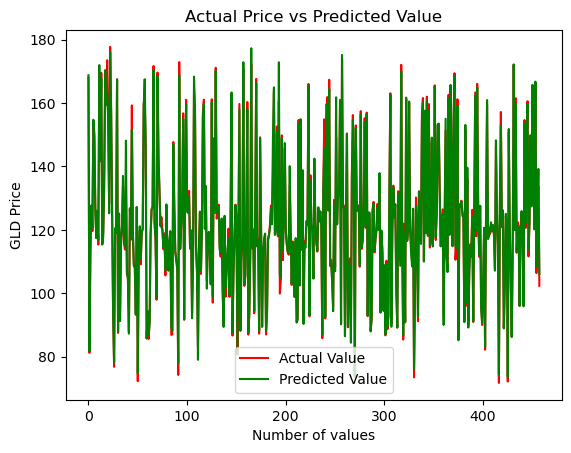

In [47]:
plt.plot(Y_test,color='Red',label = 'Actual Value')
plt.plot(test_data_prediction,color='green',label="Predicted Value")
plt.title("Actual Price vs Predicted Value")
plt.xlabel("Number of values")
plt.ylabel('GLD Price')
plt.legend()
plt.show()